# Gradient Descent
an optimization algorithm used to find the local minimum of a function. It is used in machine learning to minimize a cost or loss function by iteratively updating parameters in the opposite direction of the gradient. It works by calculating the derivative i.e slope of a function and moving in the direction opposite to the slope to reach a minimum. It can be applied to any differentiable function.

**The mathematical formula for Gradient Descent**
>$$
>x_{\text{new}} = x_{\text{old}} - \alpha \, f'(x)
>$$
>
>
>
>Where:
>
>- $x_{\text{old}}$ is the current value of the variable $x$
>- $x_{\text{new}}$ is the updated value of the variable $x$
>- $\alpha$ is the learning rate
>- $f'(x)$ is the derivative of the function




## Implementation

Here’s an example to find the minimum of $f(x)=x^2+4x+4$


In [1]:
# importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp # to get dervative, and function from user
from sympy.parsing.sympy_parser import parse_expr, standard_transformations, implicit_multiplication_application

In [2]:
def f(input_func):
    # Replace ^ with ** 
    user_input = str(input_func).replace("^", "**")
    # Enable implicit multiplication (4x → 4*x)
    transformations = (standard_transformations + (implicit_multiplication_application,))
    # Parse expression
    expr = parse_expr(user_input, transformations=transformations)

    x = sp.symbols('x')
    func_obj = sp.lambdify(x, expr, "math")
   
    return expr, func_obj
  

In [3]:
def df(input_func):
    f_x = f(input_func)[0]
    x = sp.symbols('x')
    expr = sp.diff(f_x, x)
    func_obj = sp.lambdify(x, expr, "math")
    return expr, func_obj



In [4]:

def gradient_descent(input_func, starting_point, learning_rate, iterations):
    f_x    = f(input_func)
    df_f_x = df(f_x[0])
    print(f'you entered {input_func}')
    print(f'- now, we have {f_x[0]}')
    print(f'- the derivative of the input function is {df_f_x[0]}')
    print(f'- our starting point is {starting_point}')
    x      = starting_point

    x_history = [x]
    f_x_history = [f_x[1](x)]

    for i in range(iterations):
        x = x - learning_rate * df_f_x[1](x)
        x_history.append(x)
        f_x_history.append(f_x[1](x))

        print(f'iteration {i+1}: x = {x: .4f}, f(x) = {f_x[1](x): .4f} ')

    # Plot the function and gradient descent path
    x_vals = np.linspace(min(x_history)-1, max(x_history)+1, 400)
    y_vals = [f_x[1](val) for val in x_vals]

    plt.figure(figsize=(10,6))
    plt.plot(x_vals, y_vals, label="f(x)")
    plt.scatter(x_history, f_x_history, color='red', label="Gradient Descent Steps")
    plt.plot(x_history, f_x_history, color='red', linestyle='dashed', alpha=0.5)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Gradient Descent")
    plt.legend()
    plt.grid(True)
    plt.show()

    return x

you entered x^2+4x+4
- now, we have x**2 + 4*x + 4
- the derivative of the input function is 2*x + 4
- our starting point is 0
iteration 1: x = -0.4000, f(x) =  2.5600 
iteration 2: x = -0.7200, f(x) =  1.6384 
iteration 3: x = -0.9760, f(x) =  1.0486 
iteration 4: x = -1.1808, f(x) =  0.6711 
iteration 5: x = -1.3446, f(x) =  0.4295 
iteration 6: x = -1.4757, f(x) =  0.2749 
iteration 7: x = -1.5806, f(x) =  0.1759 
iteration 8: x = -1.6645, f(x) =  0.1126 
iteration 9: x = -1.7316, f(x) =  0.0721 
iteration 10: x = -1.7853, f(x) =  0.0461 


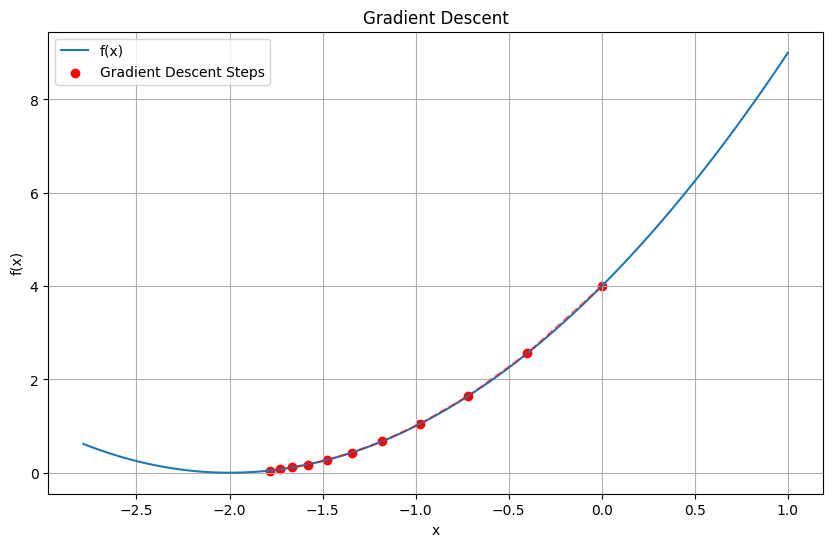


Local minimum occurs at x = -1.7853, f(x) = 0.0461


In [5]:
input_func = 'x^2+4x+4'
starting_point = 0
learning_rate = 0.1
iterations = 10

minimum = gradient_descent(input_func, starting_point, learning_rate, iterations)
print(f"\nLocal minimum occurs at x = {minimum:.4f}, f(x) = {f(input_func)[1](minimum):.4f}")